<a href="https://colab.research.google.com/github/ITA-LOW/cali_model_deploy/blob/main/ML_california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Carregando o conjunto de treino


In [3]:
cali = pd.read_csv("/content/sample_data/california_housing_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/california_housing_train.csv'

In [3]:
cali.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [4]:
cali.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [5]:
print(cali.median_house_value)


0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64


In [6]:
df_cali = pd.DataFrame(cali)
df_cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [7]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [8]:
cali.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
cali.isnull().sum()
#não tem valores nulos

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### Exploratória


In [12]:
corr = cali.corr()

<Axes: >

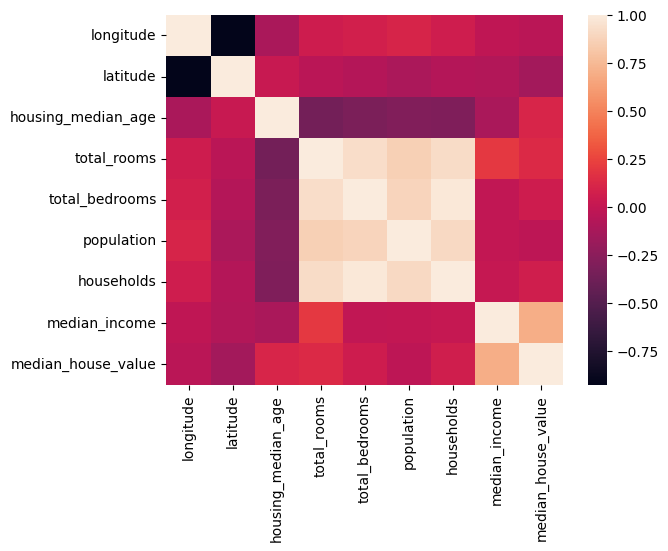

In [13]:
sns.heatmap(corr)

In [ ]:
sns.pairplot(cali)

In [ ]:
#plt.scatter(cali['median_house_value'], cali['median_income'])
sns.regplot(x='median_house_value', y='median_income', data=cali, marker='*')

In [26]:
# prompt: separe cali em treino e teste

from sklearn.model_selection import train_test_split

# Separate features and target
features = cali.drop('median_house_value', axis=1)
target = cali['median_house_value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (13600, 8)
y_train shape: (13600,)
X_test shape: (3400, 8)
y_test shape: (3400,)


In [ ]:
# prompt: use a tecnica de standard scale para estandarizar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the standardized data
print(X_train_scaled[0:5])


In [30]:
# prompt: treine um modelo de regressao linear e use validação cruzada

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print the average cross-validation score
print("Average cross-validation score:", scores.mean())


Average cross-validation score: 0.6318140888998618


In [33]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# prompt: printe os coeficientes da funcao do modelo

model.fit(X_train_scaled, y_train)
print(model.coef_)


[-87098.4338362  -91983.10201418  14256.83761054 -19175.06416171
  47893.65721918 -41374.29058064  17328.74502305  76754.0430694 ]


In [34]:
# prompt: mostre em quais parametros o modelo foi treinado

print(model.get_params())


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [43]:
# prompt: faça previsões usando o modelo e mostre r2 score, mean_squared_error,  mean_absolute_error, adjust R square

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import max_error, median_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
max_error = max_error(y_test, y_pred)
median_absolute_error = median_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Max error:", max_error)
print("Median absolute error:", median_absolute_error)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean)**2)
ss_residual = np.sum((y_test - y_pred)**2)

r2_adjusted = 1 - ((ss_residual / (len(y_test) - len(X_train.columns) - 1)) / (ss_total / (len(y_test) - 1)))

print("Adjusted R2 score:", r2_adjusted)


R2 score: 0.6636396350243802
Mean squared error: 4634658406.223357
Mean absolute error: 49983.474651229226
Max error: 370736.53183114564
Median absolute error: 38154.81995667941
Adjusted R2 score: 0.6628460983331962


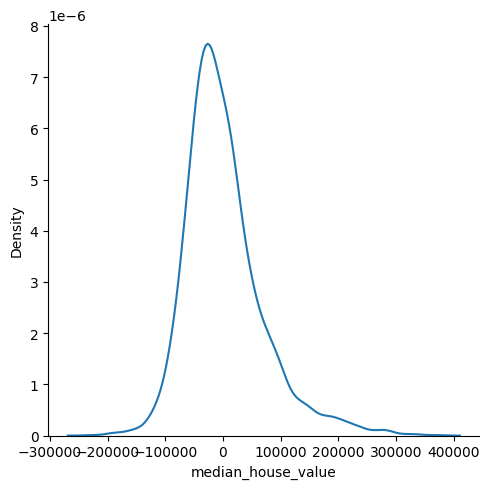

In [39]:
# prompt: calcule os residuos (y_test - y_pred) e faça um grafico com sns.displot

residuals = y_test - y_pred
sns.displot(residuals, kind='kde')
# como o valor dos erros esta mais perto de 0 o modelo esta bom

## Prevendo em novos dados


In [44]:
novos_dados = pd.read_csv('/content/sample_data/california_housing_test.csv')
novos_dados.shape

(3000, 9)

In [50]:
conj_teste = novos_dados.drop('median_house_value', axis=1)
conj_resp = novos_dados['median_house_value']

In [57]:
novos_dados.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0


In [55]:
conj_teste.iloc[0]

longitude             -122.0500
latitude                37.3700
housing_median_age      27.0000
total_rooms           3885.0000
total_bedrooms         661.0000
population            1537.0000
households             606.0000
median_income            6.6085
Name: 0, dtype: float64

In [58]:
conj_teste_scaler = scaler.fit_transform(conj_teste)

In [63]:
conj_teste_scaler[0].reshape(1,-1)

array([[-1.23372874,  0.81463305, -0.14699983,  0.59641845,  0.31533695,
         0.13024561,  0.31773437,  1.51074547]])

In [64]:
model.predict(conj_teste_scaler[0].reshape(1,-1))
# very nice prediction

array([356874.68795842])

In [66]:
previsoes = model.predict(conj_teste_scaler)

In [69]:
r = r2_score(conj_resp, previsoes)
ms = mean_squared_error(conj_resp, previsoes)
ma = mean_absolute_error(conj_resp, previsoes)
#max_erro = max_error(conj_resp, previsoes)
#median_absolute_erro = median_absolute_error(conj_resp, previsoes)

print("R2 score:", r)
print("Mean squared error:", ms)
print("Mean absolute error:", ma)
#print("Max error:", max_erro)
#print("Median absolute error:", median_absolute_erro)

R2 score: 0.6190170165322166
Mean squared error: 4873457494.983221
Mean absolute error: 50573.916266655244


In [76]:
# prompt: print a linha 42 do novos_dados

print(novos_dados.iloc[41])


longitude               -116.9200
latitude                  32.7700
housing_median_age        16.0000
total_rooms             2770.0000
total_bedrooms           406.0000
population              1269.0000
households               429.0000
median_income              6.6783
median_house_value    275000.0000
Name: 41, dtype: float64


In [79]:
model.predict(conj_teste_scaler[41].reshape(1,-1))

array([304871.76045251])

## pegando o modelo

In [81]:
import pickle
pickle.dump(model, open('regmodel.pkl','wb'))

In [82]:
pic_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/ML_project/Maintenance_detection/regmodel.pkl', 'rb'))

In [84]:
pic_model.predict(conj_teste_scaler[41].reshape(1,-1))

array([304871.76045251])